In [1]:
%cd ..

/hdd/aouadt/these/projets/3d_segm


In [73]:
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import deep_morpho.datasets.gray_to_channels_dataset as gcd
import deep_morpho.datasets.cifar_dataset as cd

def reload_modules():
    for modl in [gcd, cd]:
        reload(modl)

reload_modules()

In [76]:
reload_modules()

n_trials = 5
all_n_values = range(10, 30)

errors = np.zeros((n_trials, len(all_n_values)))
for n in range(n_trials):
    for j, n_values in enumerate(all_n_values):
        dataset = cd.CIFAR10Dataset(levelset_handler_args={"n_values": n_values})
        img, tar = dataset[0]
        errors[n, j] = ((dataset.from_channels_to_gray(img) - img.original) / img.original).abs().mean()



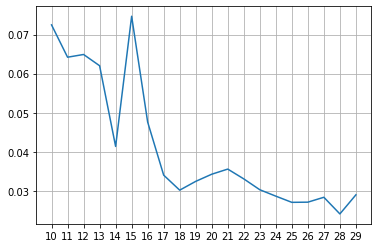

In [77]:
plt.grid('on')
plt.plot(range(10, 30), errors.mean(0))
plt.xticks(range(10, 30));


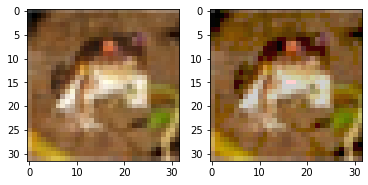

In [67]:
plt.subplot(121)
plt.imshow(img.original.numpy().transpose(1, 2, 0))

plt.subplot(122)
plt.imshow(dataset.from_channels_to_gray(img).numpy().transpose(1, 2, 0))

In [9]:
plt.imshow(img)
plt.title(dataset.classes[tar])

NameError: name 'img' is not defined